
# Plotting
In this tutorial we will explore the basic plotting tools provided by `pykep` via its {py:class}`~pykep.plot` module. The module was built as to facilitate the incremental construction of plots showing trajectories and other important quantities of interest when planning/designing interplanetary missions.

We start importing the basics:

In [1]:
import pykep as pk
import numpy as np

%matplotlib inline

## 3D Plots

In most cases one would want to start creating a 3D empty canvas where to incrementally add details. To do so we can avoid a direct interaction with the backend `matplotlib` using the convenience {py:class}`~pykep.plot.make_3Daxis` factory:

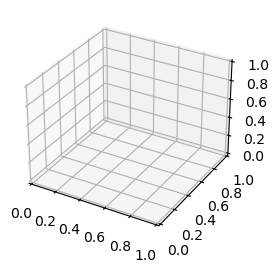

In [2]:
ax = pk.plot.make_3Daxis(figsize = (3,3));

We may then add the Sun and a few planets easily ... in the code below we will make use of the JPL low precision ephemerides, and thus use the {py:class}`~pykep.udpla.jpl_lp` User Defined Planet, but any other udpla would work.

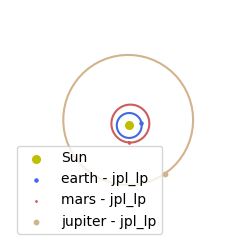

In [3]:
# Earth
udpla = pk.udpla.jpl_lp(body="EARTH")
earth = pk.planet(udpla)

# Mars
udpla = pk.udpla.jpl_lp(body="MARS")
mars = pk.planet(udpla)

#Jupiter
udpla = pk.udpla.jpl_lp(body="JUPITER")
jupiter = pk.planet(udpla)

# Plotting (both the orbit and the planet)
ax = pk.plot.make_3Daxis(figsize = (3,3))
pk.plot.add_sun(ax)

pk.plot.add_planet_orbit(ax, earth, plot_range = [0, 365.25], c = "royalblue", label = "")
pk.plot.add_planet(ax, earth, when = 0, c = "royalblue", s = 5)

pk.plot.add_planet_orbit(ax, mars, label = "", c = "indianred")
pk.plot.add_planet(ax, mars, when = 0, c = "indianred", s = 1)

pk.plot.add_planet_orbit(ax, jupiter, label = "", c = "tan")
pk.plot.add_planet(ax, jupiter, when = 0, c = "tan")

ax.legend()
ax.axis('off')
ax.view_init(90,0)

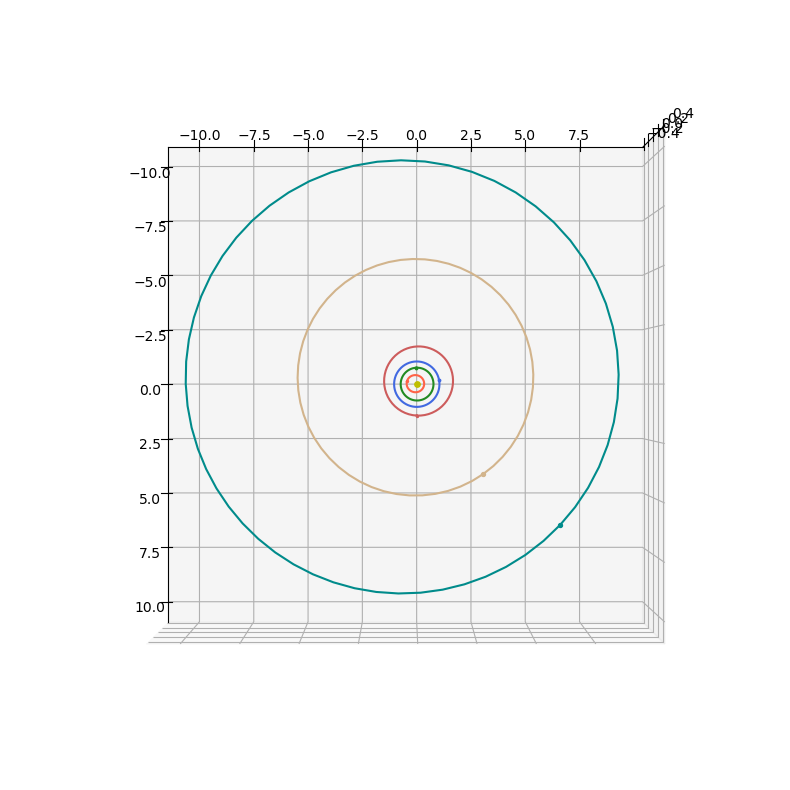

In [4]:
ax = pk.plot.make_3Daxis(figsize = (10,10))
pk.plot.add_solar_system(ax, planets = [1,2,3,4,5,6])
ax.view_init(90,0)

In [5]:
mercury.eph_v(epochs)

NameError: name 'mercury' is not defined

In [ ]:
udpla = pk.udpla.jpl_lp("mercury")
mer = pk.planet(udpla)
merK = pk.planet_to_keplerian(mer, ep = pk.epoch(0))

In [ ]:
mer

Planet name: mercury - jpl_lp
C++ class name: kep3::udpla::jpl_lp

mu central body (-1 if not defined): 1.32712440018e+20
mu body (-1 if not defined): 22032000000000
radius body (-1 if not defined): 2440000
safe body radius (-1 if not defined): 2684000

Extra info:

Low-precision planet elements: 
Semi major axis (AU): 0.38709927
Eccentricity: 0.20563593
Inclination (deg.): 7.00497902
Big Omega (deg.): 48.33076593
Small omega (deg.): 29.12703035
True anomly (deg.): 176.4928618134165
Mean anomly (deg.): 174.79252722
Elements reference epoch (MJD2000): 0
Elements reference epoch (date): 2000-01-01T00:00:00.000000
r at ref. = [-19460980613.990627, -66913981136.10061, -3679931051.0644107]
v at ref. = [36994.78019493131, -11164.250234535491, -4307.581167877297]

In [ ]:
pk.propagate_lagrangian([[1,0,0], [0,1,0]], 2.)

([-0.41614683654714235, 0.9092974268256817, 0.0],
 [-0.9092974268256817, -0.41614683654714235, -0.0])